# Регрессийн шинжилгээ
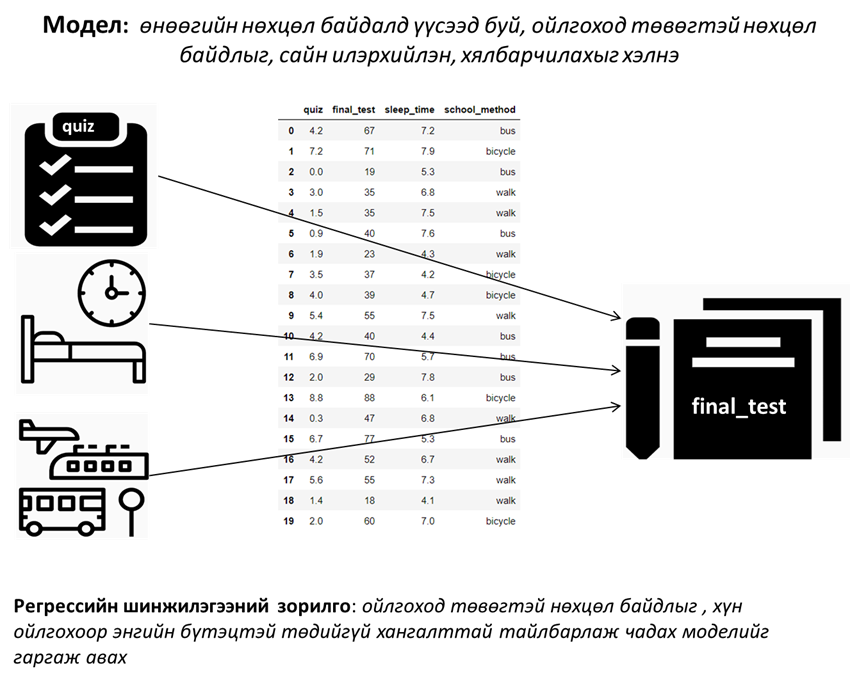

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_csv('data/ch12_scores_reg.csv')
n = len(df)
print(n)
df

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


## Sample regression model
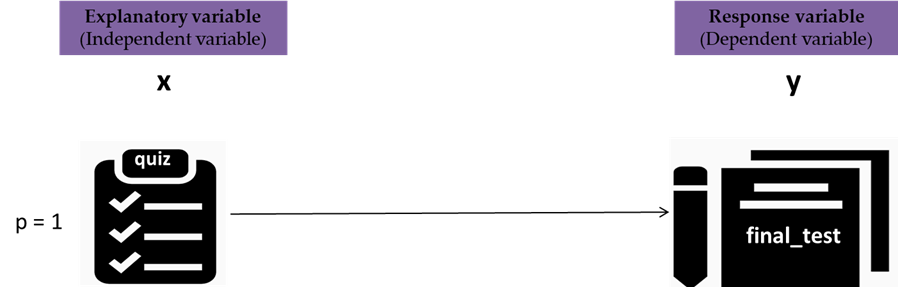

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

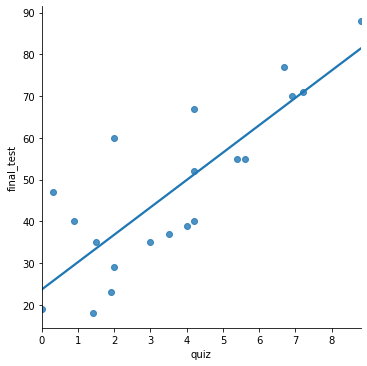

In [4]:
sns.lmplot(data=df, x='quiz', y='final_test', ci = False)

### регрессийн шинжилгээний таамаглал
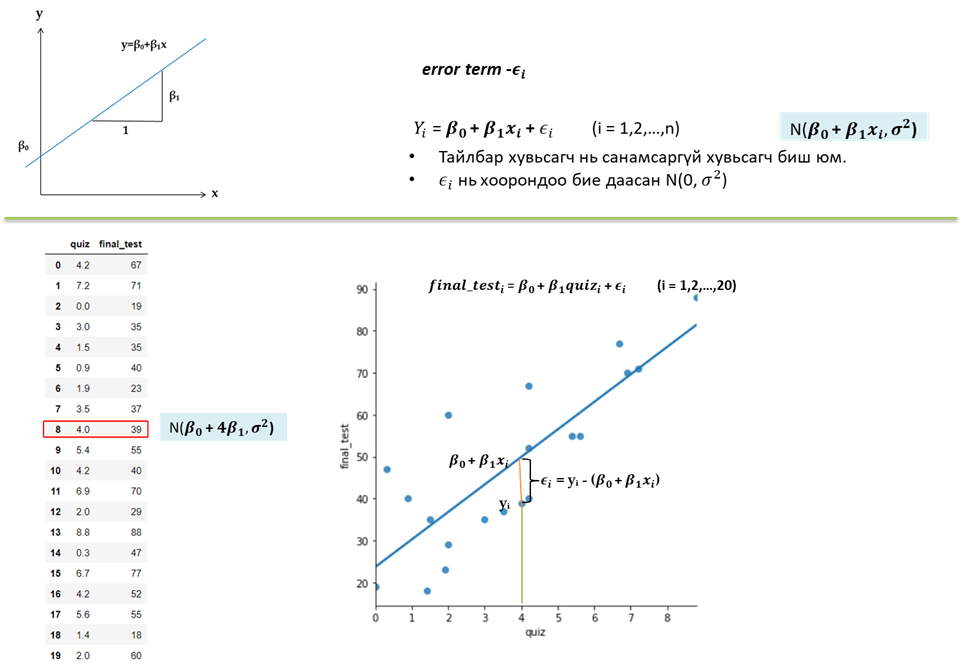

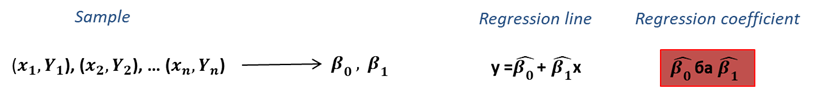

### statsmodels-р регрессийн шинжилгээ

In [5]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        11:04:56   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### regression coefficient
#### Цэгэн тооцоолол
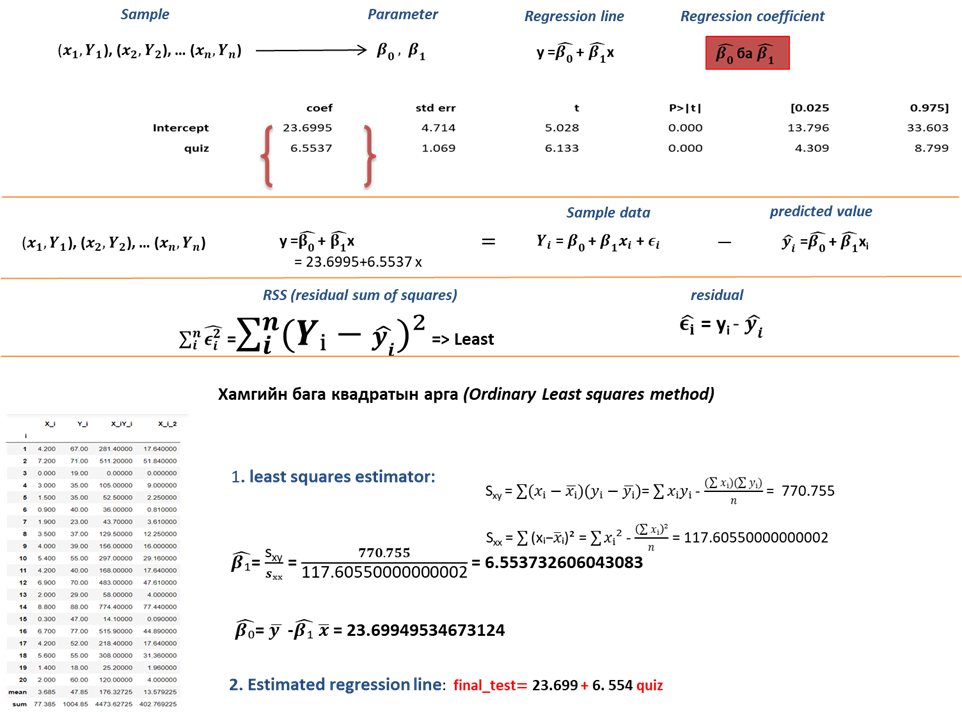

In [6]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

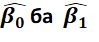

In [7]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y, rcond = -1)[0]
beta0_hat, beta1_hat

(23.699495346731226, 6.553732606043085)

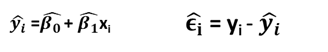

In [8]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

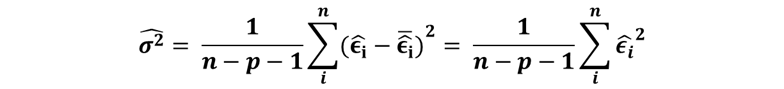

In [9]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290434734959

#### Завсрын тооцоолол
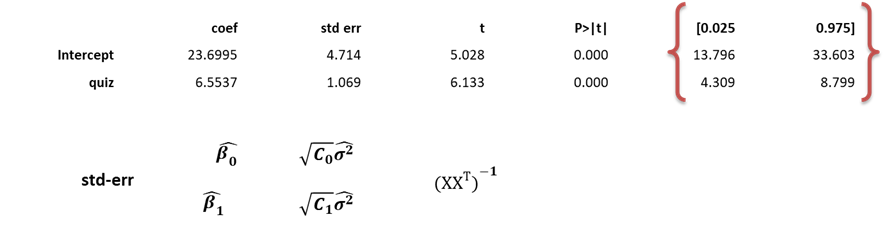

In [10]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1

(0.16546420022873096, 0.008503003686052104)

In [11]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

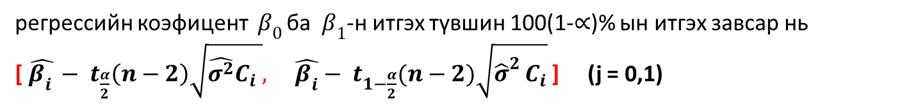

In [12]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.79609127276026, 33.602899420702194)

In [13]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125893, 8.798744574960278)

#### T test
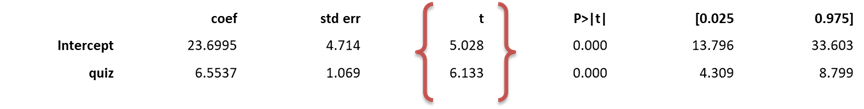

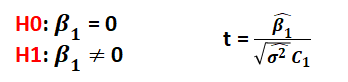

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532023

In [15]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [16]:
rv.cdf(t)

0.9999957045620667

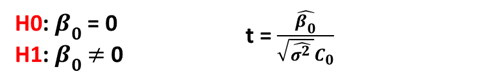

In [17]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.027644206440129

In [18]:
(1 - rv.cdf(t)) * 2

8.745298393186829e-05

## multiple regression model
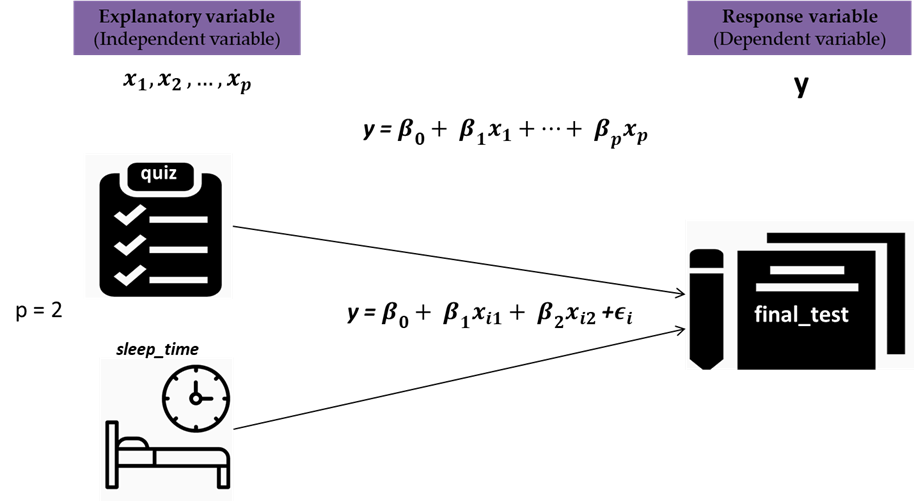

In [19]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.19e-06
Time:                        11:38:49   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### regression coefficient

In [20]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

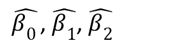

In [21]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y, rcond = -1)[0]
beta0_hat, beta1_hat, beta2_hat

(-1.8709143470996166, 6.428878343002376, 4.1917065463986845)

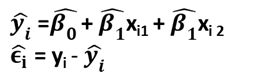

In [22]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

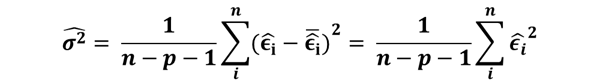

In [23]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [24]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.4402533325435596, 7.943159760253808)

### dummy variable
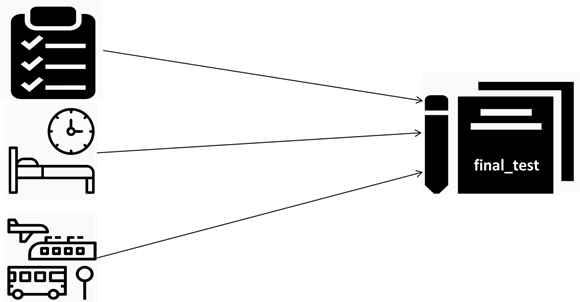
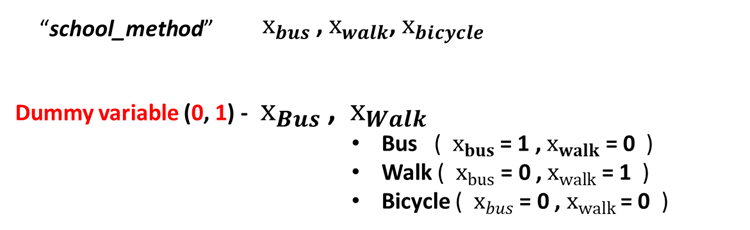

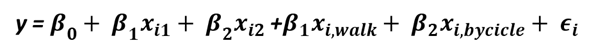

In [25]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.47e-05
Time:                        11:45:19   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Модель сонголт
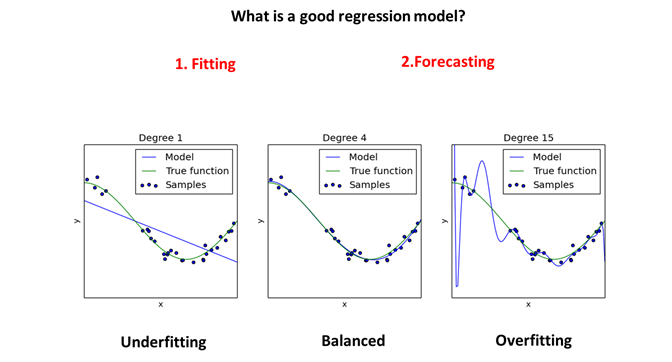

In [26]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        11:49:45   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

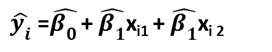

In [27]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.22517229, 70.88637011, 23.69949535, 43.36069316, 33.53009426,
       29.59785469, 36.1515873 , 46.63755947, 49.91442577, 59.08965142,
       51.22517229, 68.92025033, 36.80696056, 81.37234228, 25.66561513,
       67.60950381, 51.22517229, 60.40039794, 32.874721  , 36.80696056])

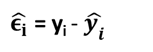

In [28]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.77482771,   0.11362989,  -4.69949535,  -8.36069316,
         1.46990574,  10.40214531, -13.1515873 ,  -9.63755947,
       -10.91442577,  -4.08965142, -11.22517229,   1.07974967,
        -7.80696056,   6.62765772,  21.33438487,   9.39049619,
         0.77482771,  -5.40039794, -14.874721  ,  23.19303944])

In [29]:
np.sum(eps_hat ** 2)

2417.227825229262

### R - squared
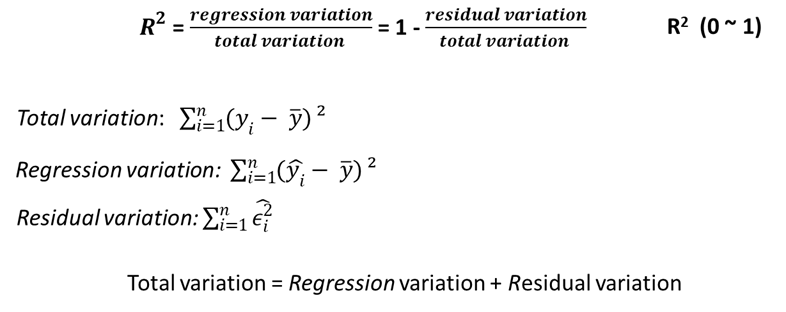

In [30]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [31]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999999)

In [32]:
exp_var / total_var

0.6763457665504999

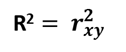

In [33]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504999

### adjuasted R squared 
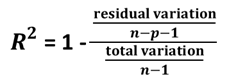
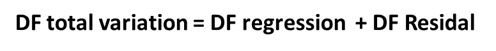

In [34]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057

### F test
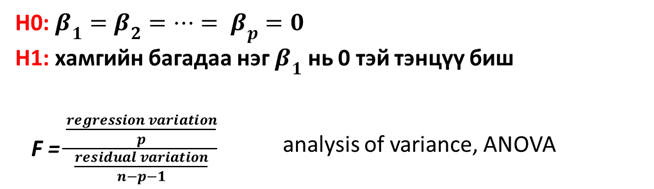

In [35]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
f

37.61490671126524

In [36]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

In [37]:
rv.cdf(f)

0.9999914091241333

### Akaike's information criterion, AIC

#### Likelihood
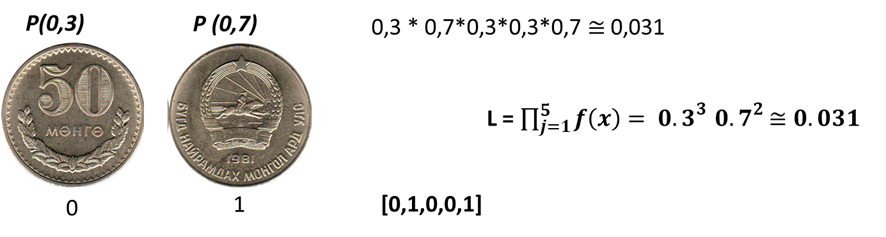

In [38]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030870000000000005

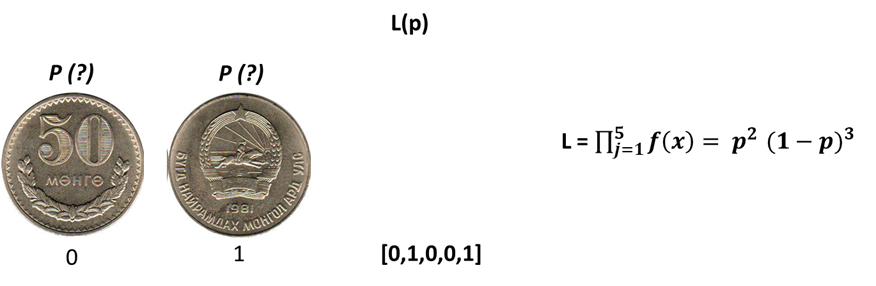

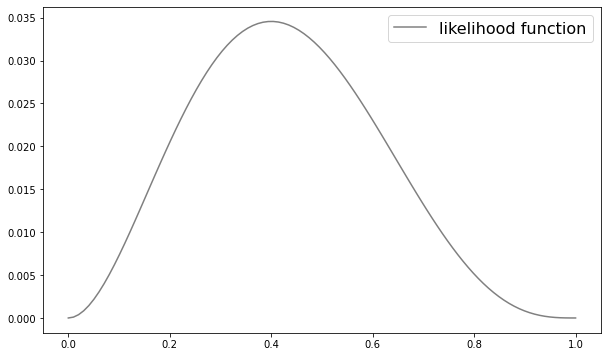

In [39]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

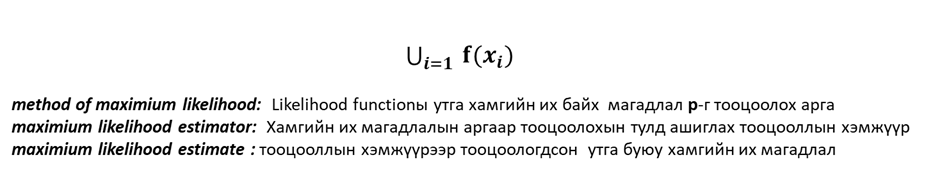

#### Log-likelihood
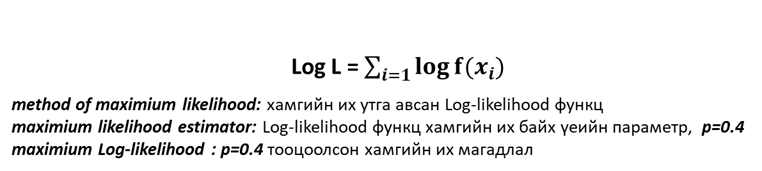

In [40]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.365058335046282

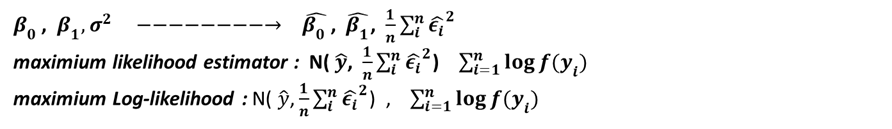

In [41]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

#### AIC, Akaike's information criterion
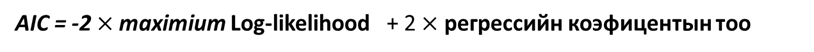

In [42]:
aic = -2 * mll + 2 * (p+1)
aic

156.65042857248076

#### Bayesian information criterion, BIC
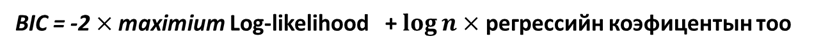

In [43]:
bic = -2 * mll + np.log(n) * (p+1) 
bic

158.64189311958876

## Моделийн хүчинтэй байдал
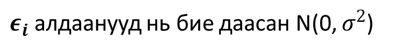

In [44]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.19e-06
Time:                        12:49:39   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
eps_hat = np.array(result.resid)

### Normality test
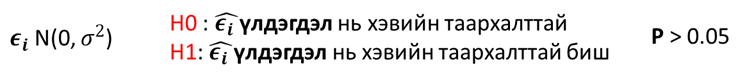

#### Skewness
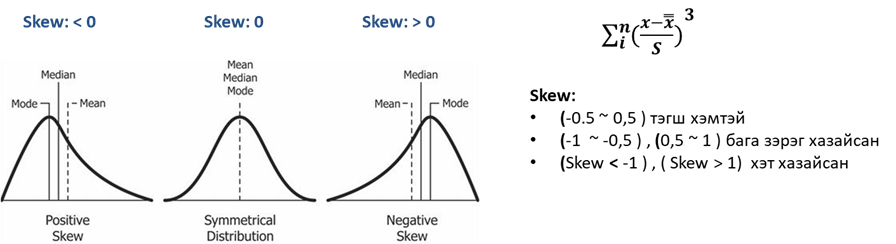

In [46]:
stats.skew(eps_hat)

0.6599489486177482

#### 2.	Kurtosis
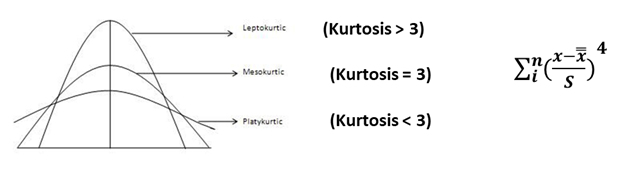

In [47]:
stats.kurtosis(eps_hat, fisher=False)

2.436583325676306

### Durbin-Watson ration
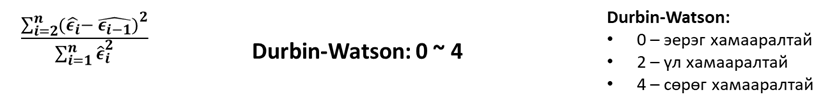

In [48]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.5082185264423016

### multicollinearity

In [49]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [50]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        13:03:09   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     2.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""